Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão : 1.0


Exercício 1

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.82      0.65      0.73        55
           2       0.94      0.89      0.91        53
           3       0.80      0.78      0.79        55
           4       0.87      0.85      0.86        54
           5       0.92      0.87      0.90        55
           6       0.84      0.89      0.86        54
           7       0.83      0.93      0.88        54
           8       0.63      0.85      0.72        52
           9       0.83      0.70      0.76        54

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540



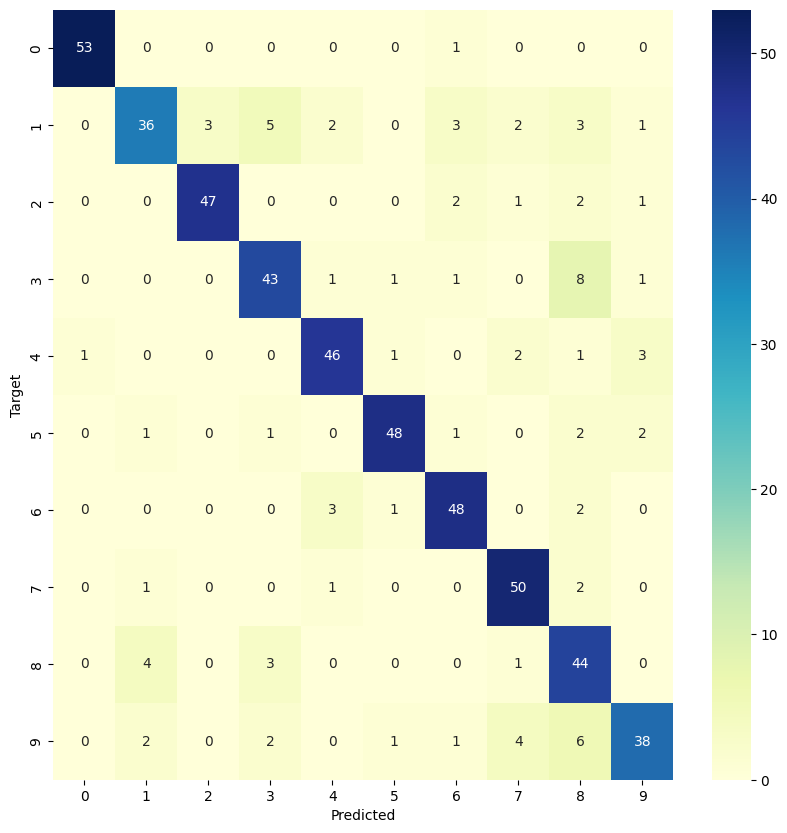

In [15]:
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns


X = load_digits().data
y = load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier(max_depth=None)
model1 = clf.fit(X_train, y_train)

# Salvar modelo
with open('modelo_ex1.pkl', 'wb') as pickle_file:
    pk.dump(model1, pickle_file)

y_pred = clf.predict(X_test)

plt.figure()
plt.rcParams["figure.figsize"]=(10,10)
cfm = pd.crosstab(y_test, y_pred, rownames=['Target'], colnames=['Predicted']).round(0)
sns.heatmap(cfm, cmap="YlGnBu" , annot=True, fmt="d")

print(classification_report(y_test, y_pred))